In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df =  pd.read_csv('SBAnational - Split.csv', sep =';')

pd.set_option('display.max_column', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,29374,1980,45,45,2,0,0,0,0,N,N,33413.00,29424.00,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
1,1000554001,PAUL E. & JUDY A. FAATZ,KINSMAN,OH,44428,CORTLAND SAVINGS & BK. CO.,OH,0,35489,1997,137,2,1,0,0,1,0,N,Y,37364.00,35611.00,"$47,000.00",$0.00,CHGOFF,"$14,084.00","$47,000.00","$37,600.00"
2,1000653000,LARRY SCHOETTMER FORD INC,EDINBURGH,IN,46124,JPMORGAN CHASE BANK NATL ASSOC,IN,0,29383,1980,120,16,2,0,0,0,0,Y,N,32785.00,29433.00,"$197,485.00",$0.00,CHGOFF,"$44,374.00","$200,000.00","$150,000.00"
3,1000726007,NEW DIMENSION HOMES INC,CLINTON (CENSUS NAME FOR CLINT,ME,4927,WELLS FARGO BANK NATL ASSOC,SD,236115,38755,2006,167,9,1,0,9,1,1,0,N,41816.00,38776.00,"$1,350,000.00",$0.00,CHGOFF,"$1,043,508.00","$1,350,000.00","$1,012,500.00"
4,1000735003,Mykols Marine Inc.,Spring Lake,MI,49417,WELLS FARGO BANK NATL ASSOC,SD,713930,35520,1997,7,10,1,0,0,1,0,0,N,38629.00,35854.00,"$25,000.00",$0.00,CHGOFF,"$23,484.00","$25,000.00","$12,500.00"


### Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      258966 non-null  int64  
 1   Name               258955 non-null  object 
 2   City               258962 non-null  object 
 3   State              258965 non-null  object 
 4   Zip                258966 non-null  int64  
 5   Bank               258791 non-null  object 
 6   BankState          258790 non-null  object 
 7   NAICS              258966 non-null  int64  
 8   ApprovalDate       258966 non-null  int64  
 9   ApprovalFY         258966 non-null  int64  
 10  Term               258966 non-null  int64  
 11  NoEmp              258966 non-null  int64  
 12  NewExist           258966 non-null  int64  
 13  CreateJob          258966 non-null  int64  
 14  RetainedJob        258966 non-null  int64  
 15  FranchiseCode      258966 non-null  int64  
 16  Ur

In [ ]:
import re

def to_integer(string):
  string = re.sub('[^\d]', '', string)
  float_value = float(string)
  integer_value = int(float_value)
  return integer_value

In [ ]:
df['DisbursementGross'] = df['DisbursementGross'].apply(to_integer)
df['BalanceGross'] = df['BalanceGross'].apply(to_integer)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(to_integer)
df['GrAppv'] = df['GrAppv'].apply(to_integer)
df['SBA_Appv'] = df['SBA_Appv'].apply(to_integer)
df['CreateJob']= df['CreateJob'].astype(int)
df['RetainedJob']= df['RetainedJob'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      258966 non-null  int64  
 1   Name               258955 non-null  object 
 2   City               258962 non-null  object 
 3   State              258965 non-null  object 
 4   Zip                258966 non-null  int64  
 5   Bank               258791 non-null  object 
 6   BankState          258790 non-null  object 
 7   NAICS              258966 non-null  int64  
 8   ApprovalDate       258966 non-null  int64  
 9   ApprovalFY         258966 non-null  int64  
 10  Term               258966 non-null  int64  
 11  NoEmp              258966 non-null  int64  
 12  NewExist           258966 non-null  int64  
 13  CreateJob          258966 non-null  int64  
 14  RetainedJob        258966 non-null  int64  
 15  FranchiseCode      258966 non-null  int64  
 16  Ur

In [ ]:
num = {'Zip', 'NAICS', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'NewExist', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ApprovalFY'}
cat = {'City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc', 'MIS_Status'}

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     11
City                      4
State                     1
Zip                       0
Bank                    175
BankState               176
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                36
LowDoc                  233
ChgOffDate           173173
DisbursementDate        487
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Term,258966.00,93.10,69.51,0.00,55.00,84.00,87.00,480.00
UrbanRural,258966.00,0.80,0.63,0.00,0.00,1.00,1.00,2.00
NewExist,258966.00,1.32,0.47,0.00,1.00,1.00,2.00,2.00
CreateJob,258966.00,23.70,439.76,0.00,0.00,0.00,1.00,8800.00
SBA_Appv,258966.00,10166568.15,18690478.29,50000.00,1250000.00,2600500.00,9690000.00,400000000.00
BalanceGross,258966.00,324.61,162702.74,0.00,0.00,0.00,0.00,82787500.00
GrAppv,258966.00,13771464.14,23428655.63,100000.00,2500000.00,5000000.00,13500000.00,400000000.00
RetainedJob,258966.00,26.09,440.22,0.00,0.00,1.00,4.00,9500.00
FranchiseCode,258966.00,1797.27,10370.93,0.00,0.00,1.00,1.00,91999.00
NAICS,258966.00,415848.88,251668.40,0.00,238210.00,448310.00,561730.00,928120.00


In [ ]:
df[cat].describe().T

,count,unique,top,freq
City,258962,19832,LOS ANGELES,3871
RevLineCr,258930,7,N,112141
BankState,258790,52,NC,38140
MIS_Status,258966,2,P I F,175428
Bank,258791,3667,BANK OF AMERICA NATL ASSOC,38711
LowDoc,258733,7,N,240509
State,258965,51,CA,37290


A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
- Terdapat kolom yang memiliki tipe data tidak sesuai, contohnya seperti UrbanRural, NewExist, SBA_Appv, etc

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- Terdapat kolom yang memiliki missing-value seperti Name, City, State, Bank, BankState, RevLineCr, LowDoc, ChgOffDate, DisbursementDate

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
- Beberapa features memiliki positif skewed seperti ChgOffPrinGr, BalanceGross, CreateJob.
- Pada RetainedJob, nilai 75% adalah 4 tetapi nilai maksimumnya adalah 9500, begitu juga dengan CreateJob memiliki nilai pada 75% sebesar 1 sedangkan nilai maksimumnya adalah 8800, serta NoEmp nilai pada 75% sebesar 8 sedangkan nilai maksimumnya 9999.
- Kolom "Zip" memiliki nilai minimum 0 yang mungkin tidak sesuai sebagai kode pos yang valid.

### Univariate Analysis

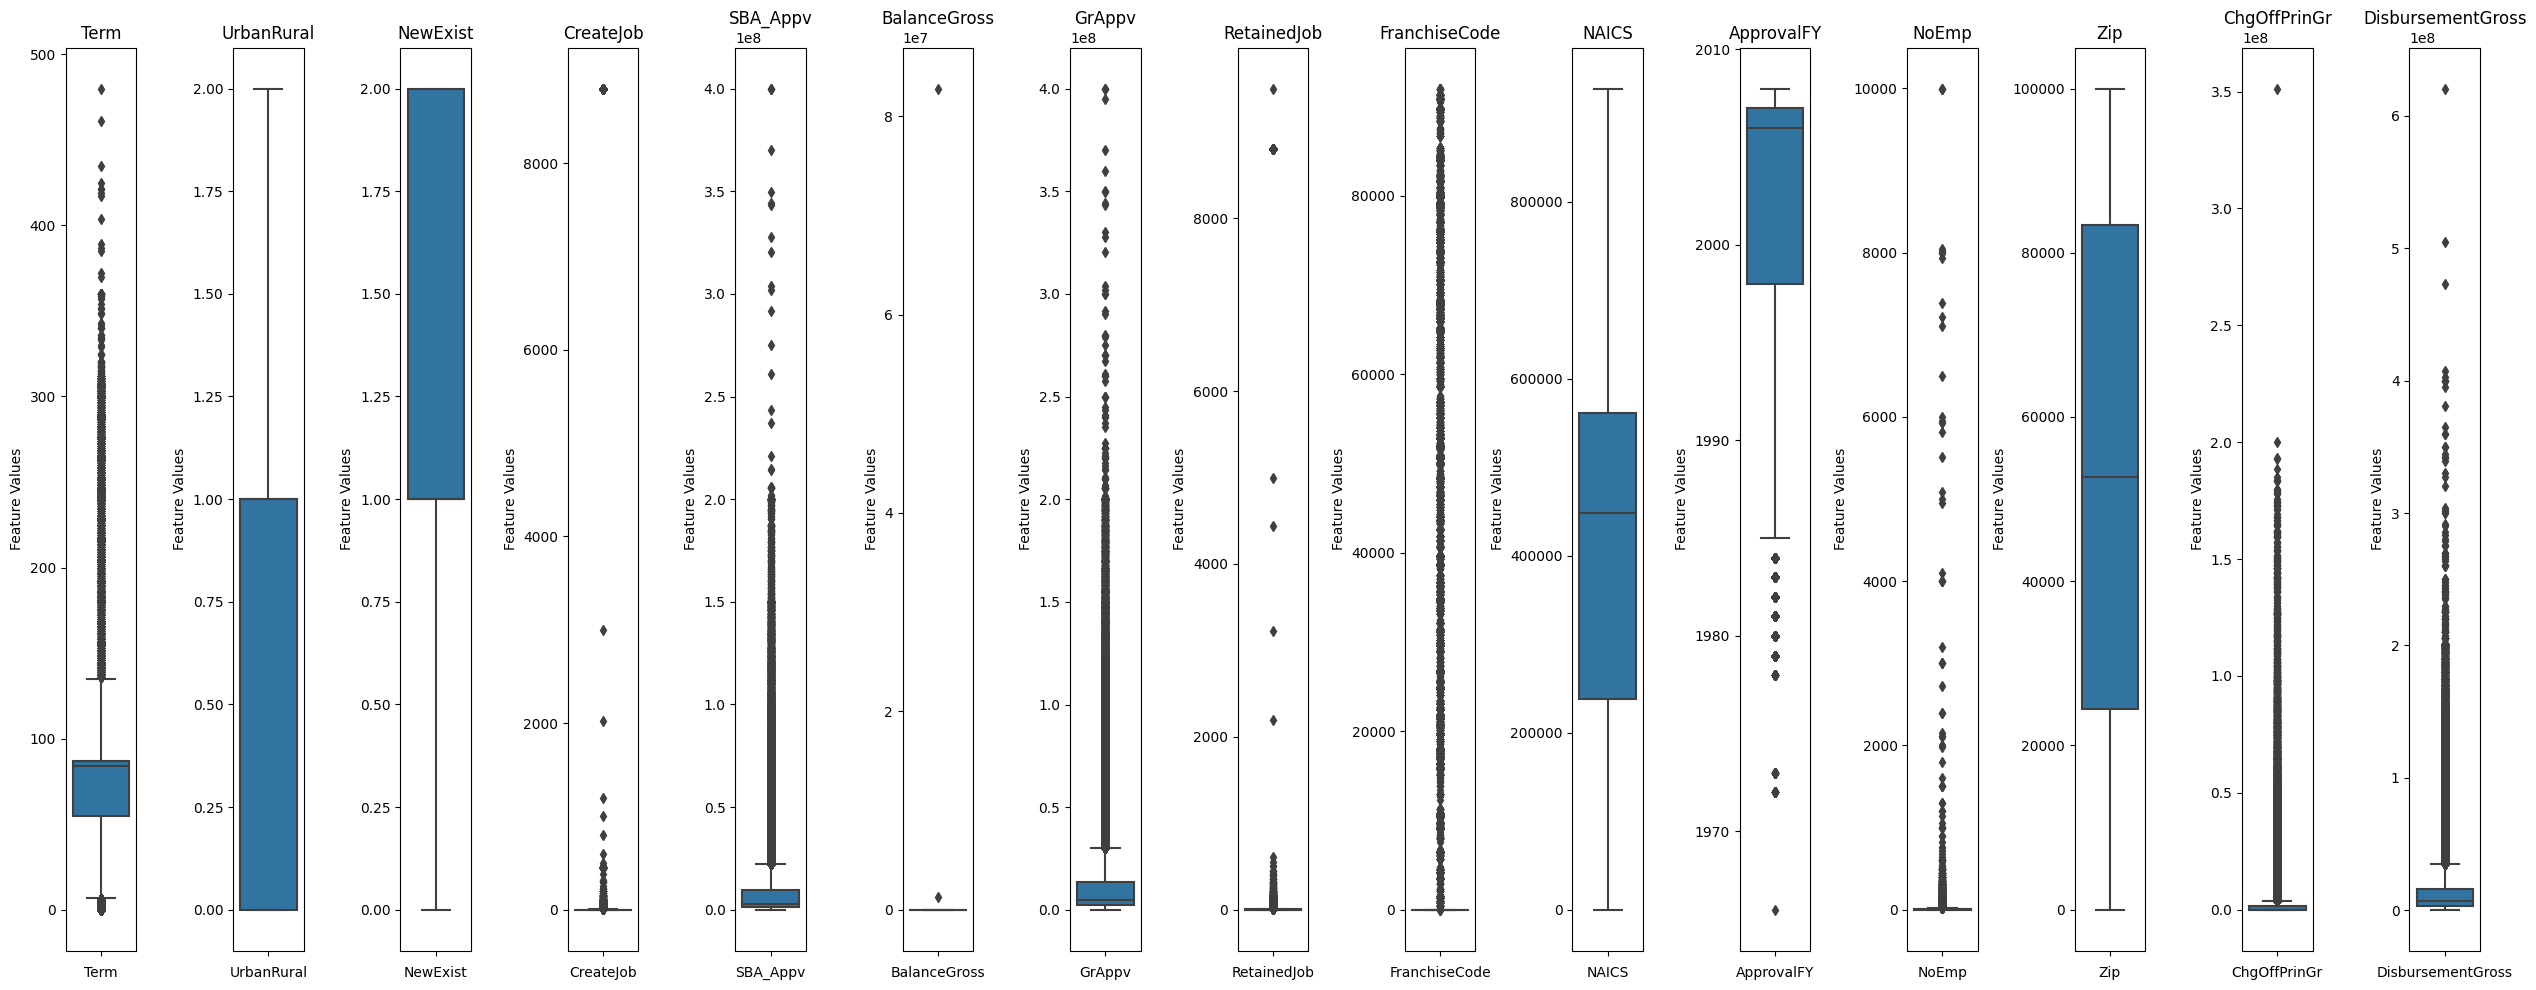

In [ ]:
fig, axes = plt.subplots(1, len(num), figsize=(25, 10))

for i, feature in enumerate(num):
    sns.boxplot(y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Feature Values')
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

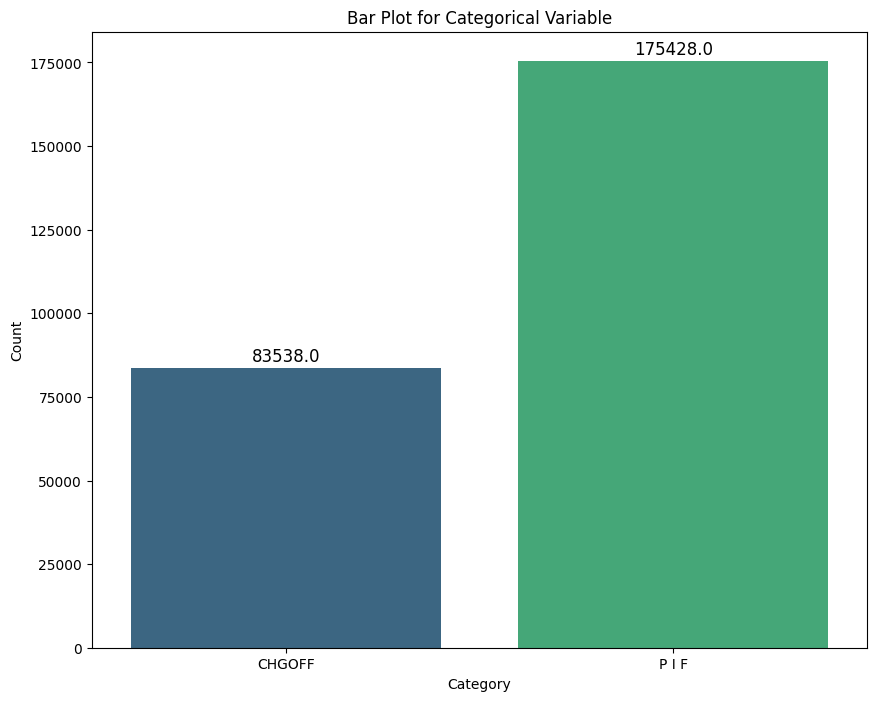

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='MIS_Status', data=df, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot for Categorical Variable')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

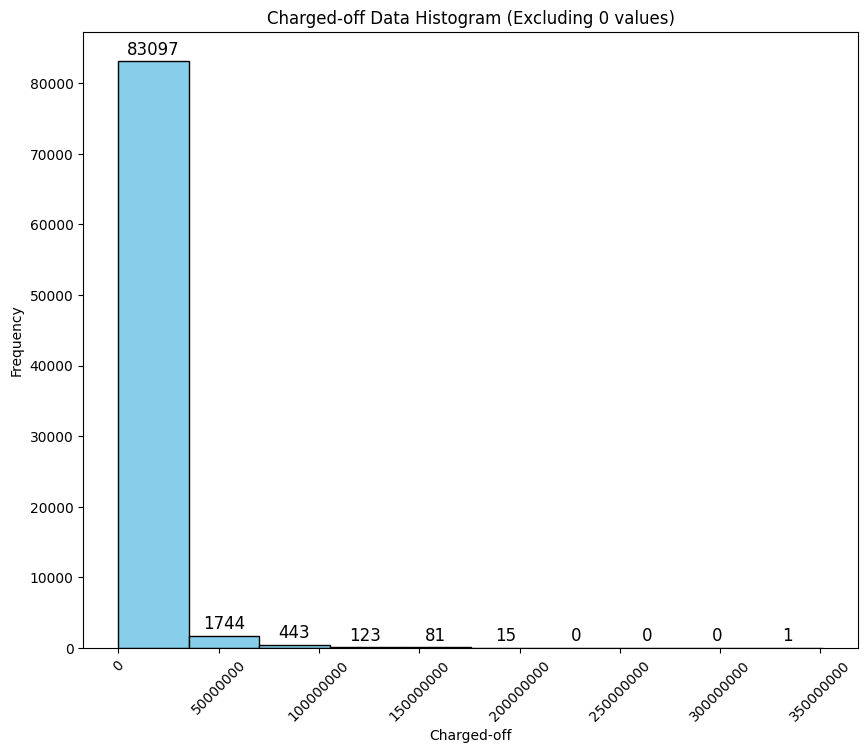

In [ ]:
filtered_ChgOffPrinGr = [value for value in df['ChgOffPrinGr'] if value != 0]

plt.figure(figsize=(10, 8))
plt.hist(filtered_ChgOffPrinGr, bins=10, color='skyblue', edgecolor='black')

plt.title('Charged-off Data Histogram (Excluding 0 values)')
plt.xlabel('Charged-off')
plt.ylabel('Frequency')

for bar in plt.gca().patches:
    plt.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

plt.show()

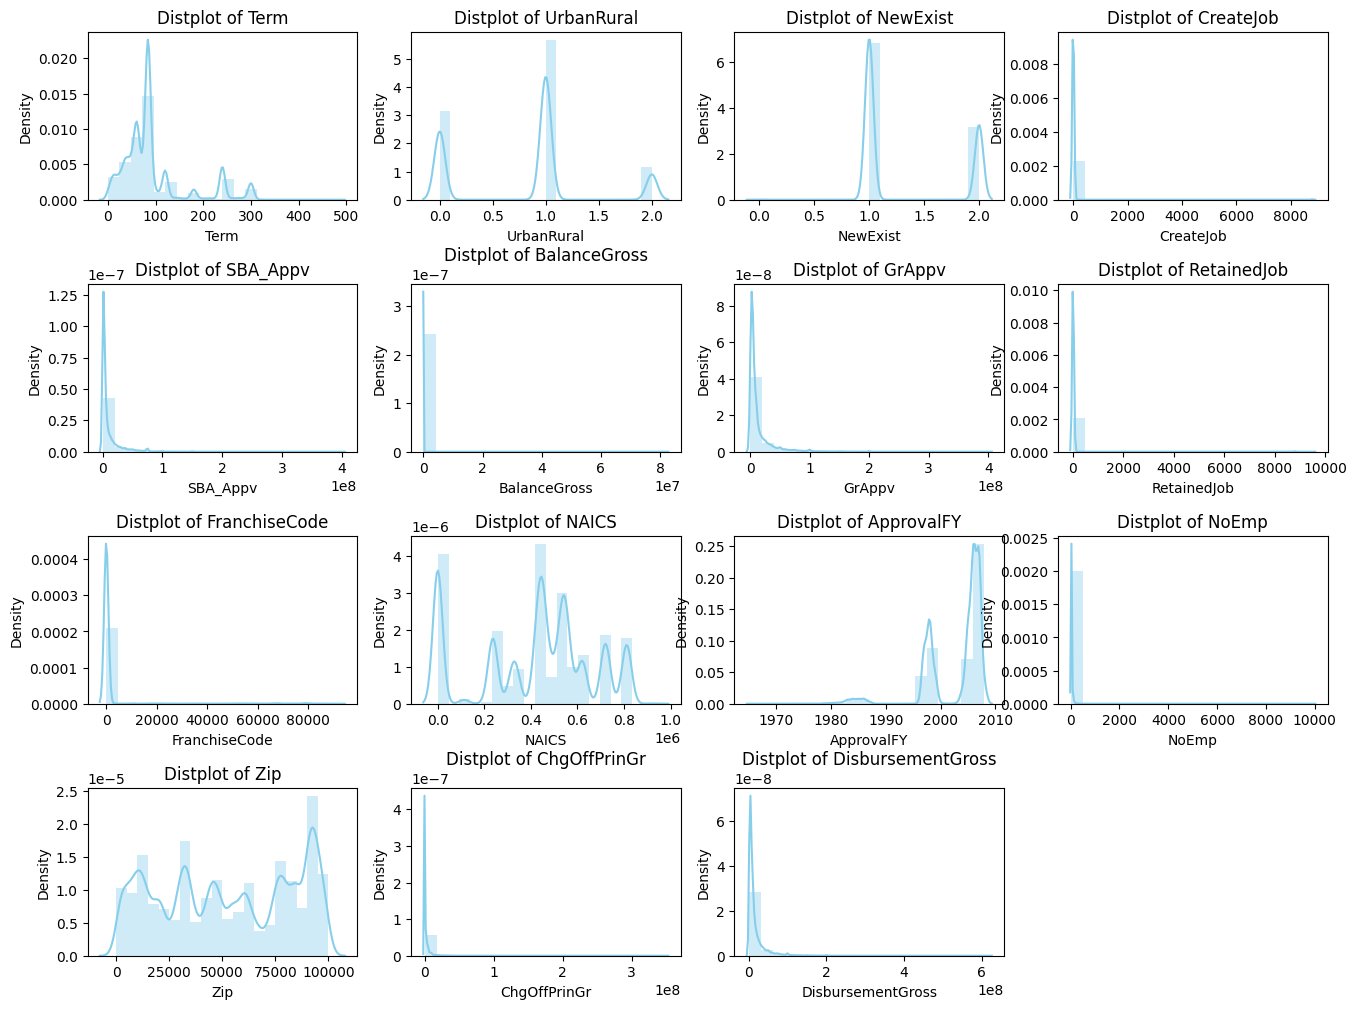

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)

for i, variable in enumerate(num):
    plt.subplot(4, 4, i + 1)
    sns.distplot(df[variable], bins=20, color='skyblue')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title(f'Distplot of {variable}')

plt.show()

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

1. Menghapus/Drop feature yang tidak diperlukan seperti LoanNr_ChkDgt, Name, Zip, Bank, BankState, dll.
2. Distribusi nilai zip mirip dengan distribusi normal, sedangkan untuk yang lainnya di numerical tidak memiliki distribusi normal.
3. Nilai 0 pada ChgOffPrinGr sangatlah banyak dikarenakan perbandingan jumlah data PIF dengan ChgOff pada MIS_Status sangatlah besar
4. Mengatasi outliers yang terdapat pada data.

### Multivariate Analysis

In [ ]:
df['MIS_Status_int'] = df['MIS_Status'].replace('P I F', 1).replace('CHGOFF', 0)

In [ ]:
num = {'Zip', 'NAICS', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'NewExist', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ApprovalFY','MIS_Status_int'}

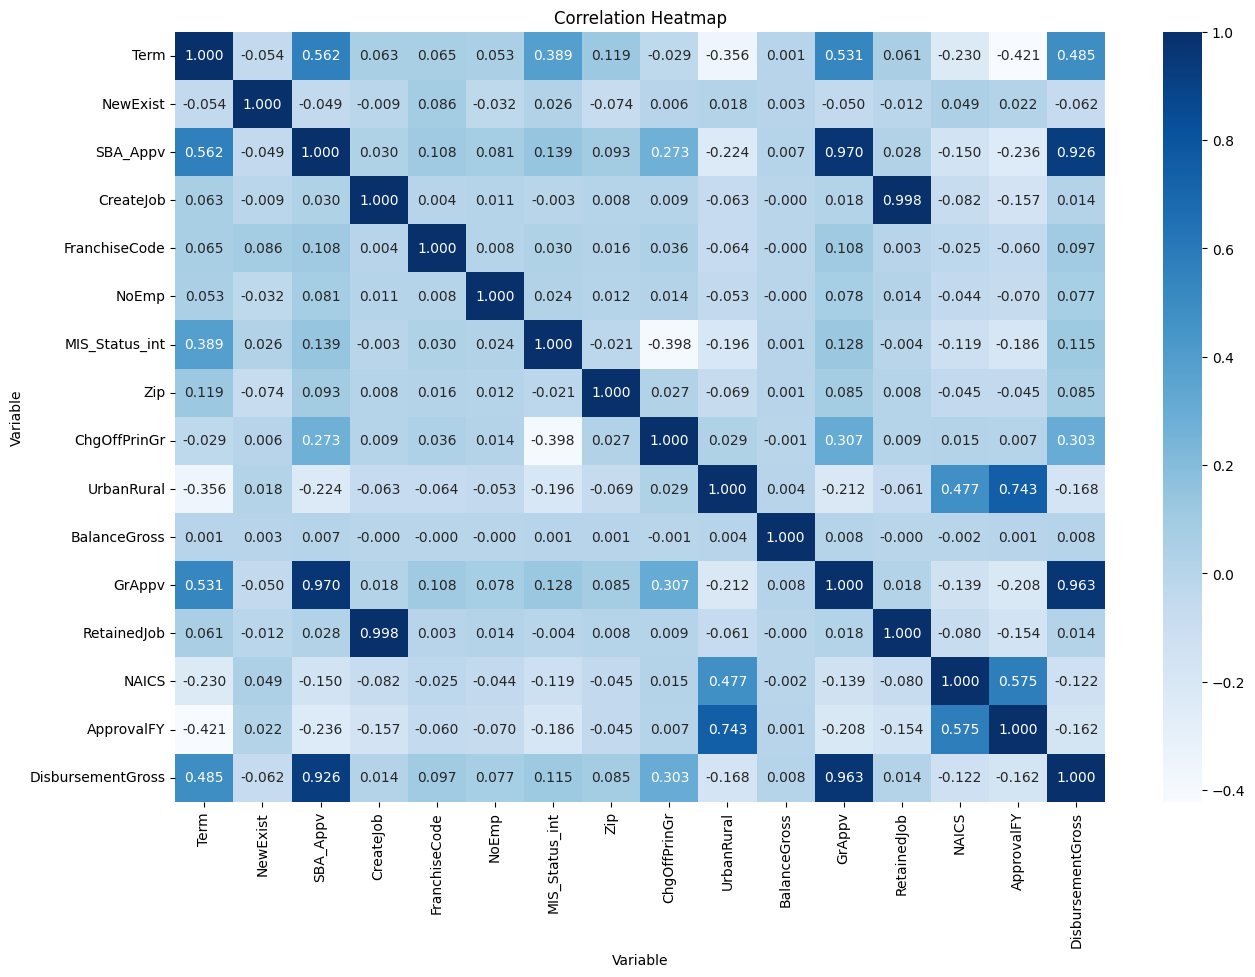

In [ ]:
num_corr = df[num].corr()

plt.figure(figsize=(15,10))
sns.heatmap(num_corr, cmap='Blues', annot = True, fmt='.3f')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Correlation Heatmap')
plt.show()

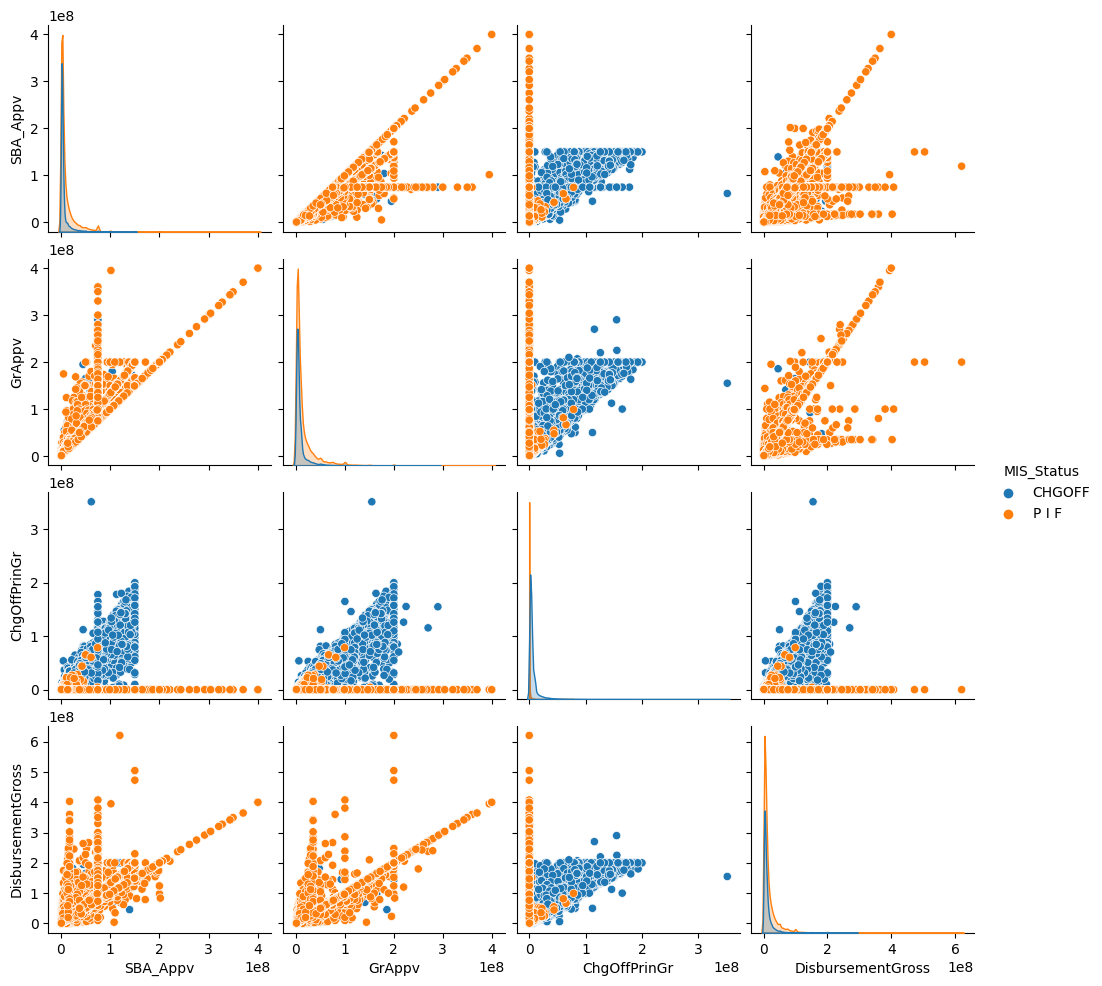

In [ ]:
test = {'SBA_Appv', 'GrAppv', 'ChgOffPrinGr', 'DisbursementGross', 'MIS_Status'}

sns.pairplot(df[test], hue='MIS_Status')
plt.show()

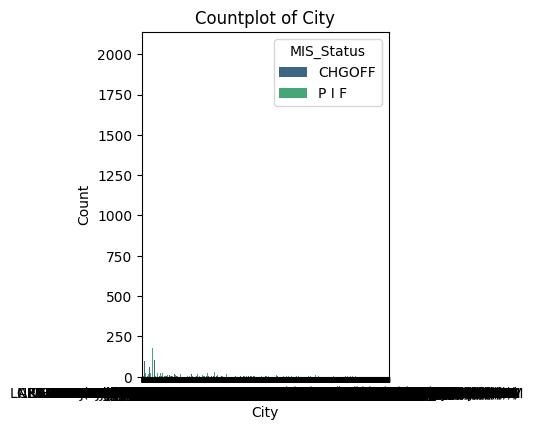

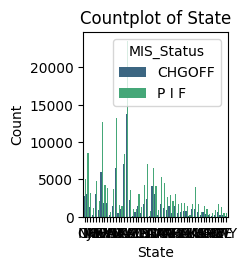

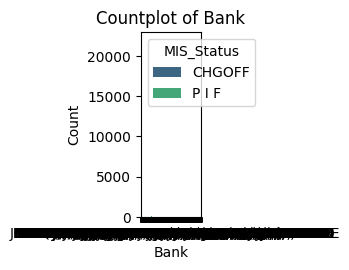

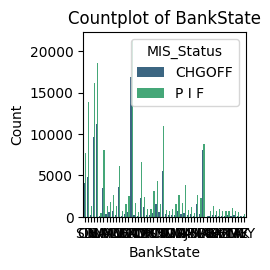

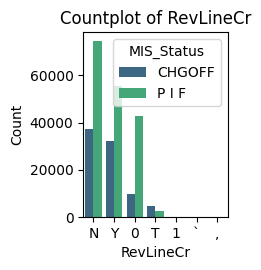

In [ ]:
cat = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc', 'MIS_Status']

# Countplot untuk melihat korelasi antar fitur kategorikal
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=cat[i], hue='MIS_Status', palette='viridis')
    plt.title(f'Countplot of {cat[i]}')
    plt.xlabel(cat[i])
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?
- Kemudian fitur Retained Job memiliki korelasi yang tinggi dengan Create Job
- Fitur GrAppv juga memiliki korelasi yang tinggi dengan Disbursement Gross dan SBA_Appv
- NAICS dengan UrbanRural juga memiliki korelasi yang cukup tinggi, hal ini dikarenakan 2 digit didepan NAICS mewakili sektor industri apa yang paling banyak di daerah tersebut.
- Fitur **Term** dengan **GRAppv/SBA_Appv**, kedua fitur memiliki korelasi yang positif. Hal ini menunjukan bahwa semakin lama jangka pinjaman, jumlah pinjaman kotor yang disetujui bank cenderung semakin besar.

Terdapat beberapa fitur yang memiliki korelasi dengan MIS_Status (Fitur target) yaitu ChgOffPrinGr(-0.398), Term(0.389), SBA_Appv (0.139), GrAppv (0.128), ApprovalFY(-0.186), Disbursement Gross (0.115) dan UrbanRural (-0.196). Untuk fitur numerical terdapat dua fitur yang paling relevan yaitu **ChgOffPrinGr(-0.398) dan Term(0.389)**. Oleh karena itu kedua fitur ini harus dipertahankan. Untuk fitur kategorikal, terdapat satu fitur yang terlihat berasosiasi dengan fitur target yaitu **RevLineCr** karena memiliki range yang cukup jauh antara CHGOFF dan PIF. Sementara untuk fitur kategorikal lainnya terlalu banyak fitur unique dan akan lebih baik dihilangkan untuk mengurangi ukuran dimensi.<br><br>


B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?
- Terdapat pola yang menarik pada ChgOffPrinGr yaitu terdapat beberapa poin PIF tetapi dia memiliki biaya yang harus dibayarkan, feature MIS_Status dengan ChgOffPrinGr perlu diperhatikan lebih lanjut
- Terdapat pola menarik pada fitur **GrAppv** dan **SBA_Appv** , kedua fitur hampir sama namun memiliki perbedaan. Dari fitur ini bisa dilakukan pembagian antara **SBA_Appv** dan **GrAppv** untuk mengetahui seberapa persen SBA biasanya menjamin pinjaman. Hasil yang didpatkan kemungkinan bisa dipakai dalam pemodelan. Lalu fitur **GrAppv** dan **DisbursementGross** juga terbilang hampir mirip namun berbeda, mungkin fitur ini bisa menjadi masukan. Fitur ini dapat diberikan nilai 1 ketika GrAppv=DisbursementGross dan 0 untuk sebaliknya.<br><br>
 Namun perlu diingat karena terdapat fitur-fitur dengan korelasi kuat maka salah satunya perlu dihilangkan saat akan melakukan pemodelan nanti.



### Business Insight

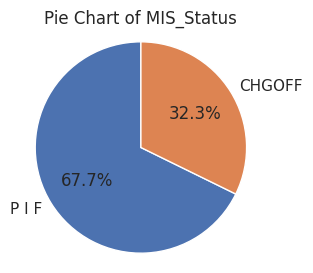

In [ ]:
# Hitung jumlah masing-masing nilai MIS_Status
mis_status_counts = df['MIS_Status'].value_counts()

# Buat pie chart dengan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(3, 3))
plt.pie(mis_status_counts, labels=mis_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of MIS_Status')
plt.axis('equal')
plt.show()

In [ ]:
df['Industry'] = df['NAICS'].astype(str).apply(lambda x: x[:2])
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

df['Industry'].fillna('Unknown', inplace=True)

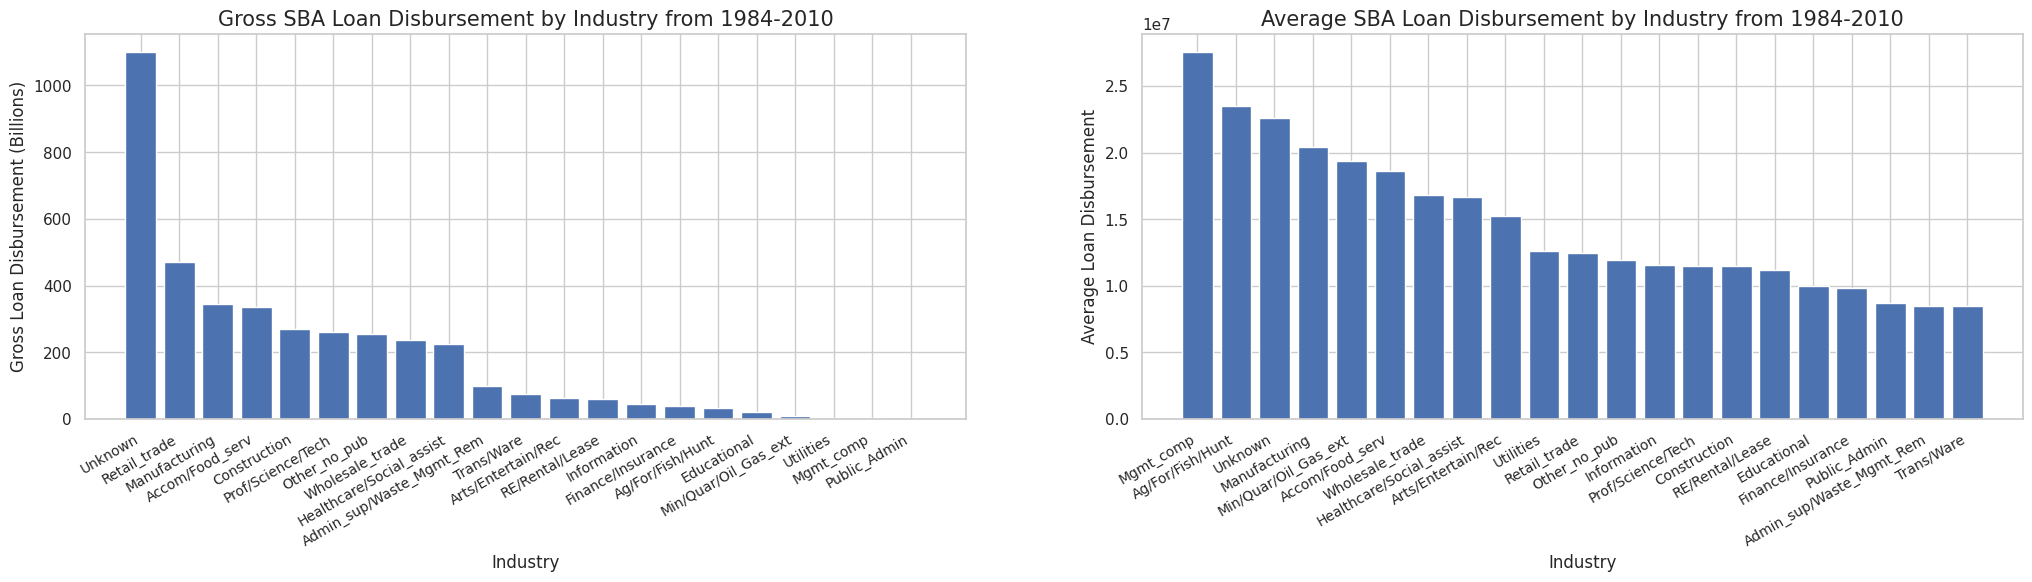

In [ ]:
# Total dan Rata-rata dana cair menurut industri

industry_group = df.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Industry
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()

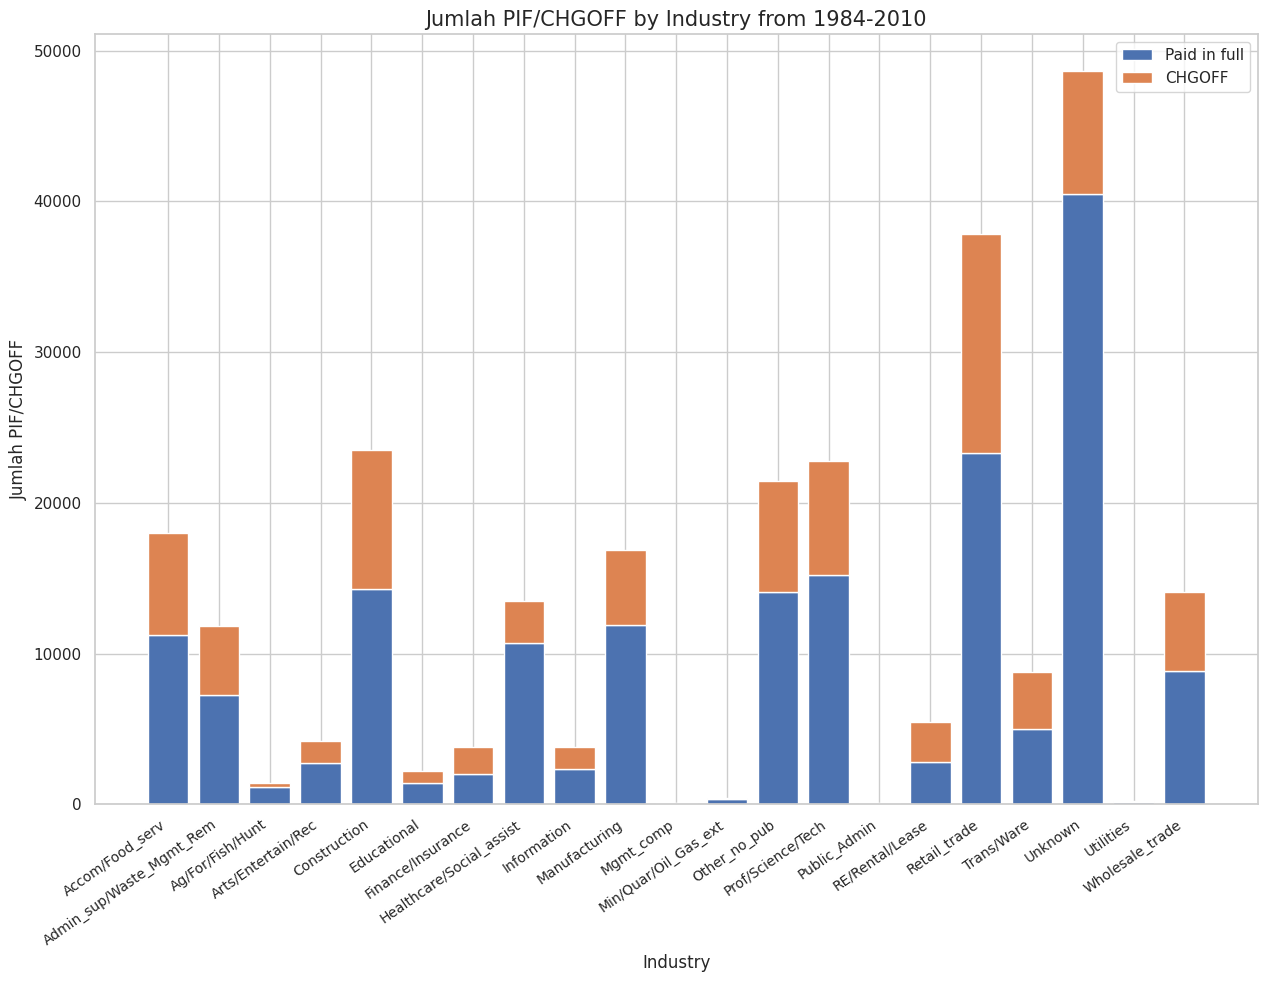

In [ ]:
# PIF dan CHGOFF by Industry

fig, ax = plt.subplots(figsize=(15, 10))

# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    ax.bar(data.index, data[1], label='Paid in full')
    ax.bar(data.index, data[0], bottom=data[1], label='CHGOFF')


stacked(df=df, col='Industry', ax=ax)
ax.set_xticklabels(df.groupby(['Industry', 'MIS_Status_int'])['Industry'].count().unstack('MIS_Status_int').index,
                   rotation=35, horizontalalignment='right', fontsize=10)

ax.set_title('Jumlah PIF/CHGOFF by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Jumlah PIF/CHGOFF')
ax.legend()
plt.show()

In [ ]:
# Cek Persentase CHGOFF untuk tiap Industri

df_ind = df.groupby(['Industry', 'MIS_Status_int'])['Industry'].count().unstack('MIS_Status_int')
df_ind['Persentase'] = df_ind[0] / (df_ind[0] + df_ind[1])
df_ind['Persentase'].sort_values(ascending=False)

Industry
RE/Rental/Lease            0.48
Finance/Insurance          0.47
Trans/Ware                 0.43
Construction               0.39
Information                0.39
Admin_sup/Waste_Mgmt_Rem   0.39
Retail_trade               0.38
Educational                0.38
Accom/Food_serv            0.37
Wholesale_trade            0.37
Arts/Entertain/Rec         0.35
Other_no_pub               0.34
Prof/Science/Tech          0.33
Manufacturing              0.30
Utilities                  0.28
Public_Admin               0.22
Mgmt_comp                  0.21
Healthcare/Social_assist   0.20
Unknown                    0.17
Ag/For/Fish/Hunt           0.16
Min/Quar/Oil_Gas_ext       0.14
Name: Persentase, dtype: float64

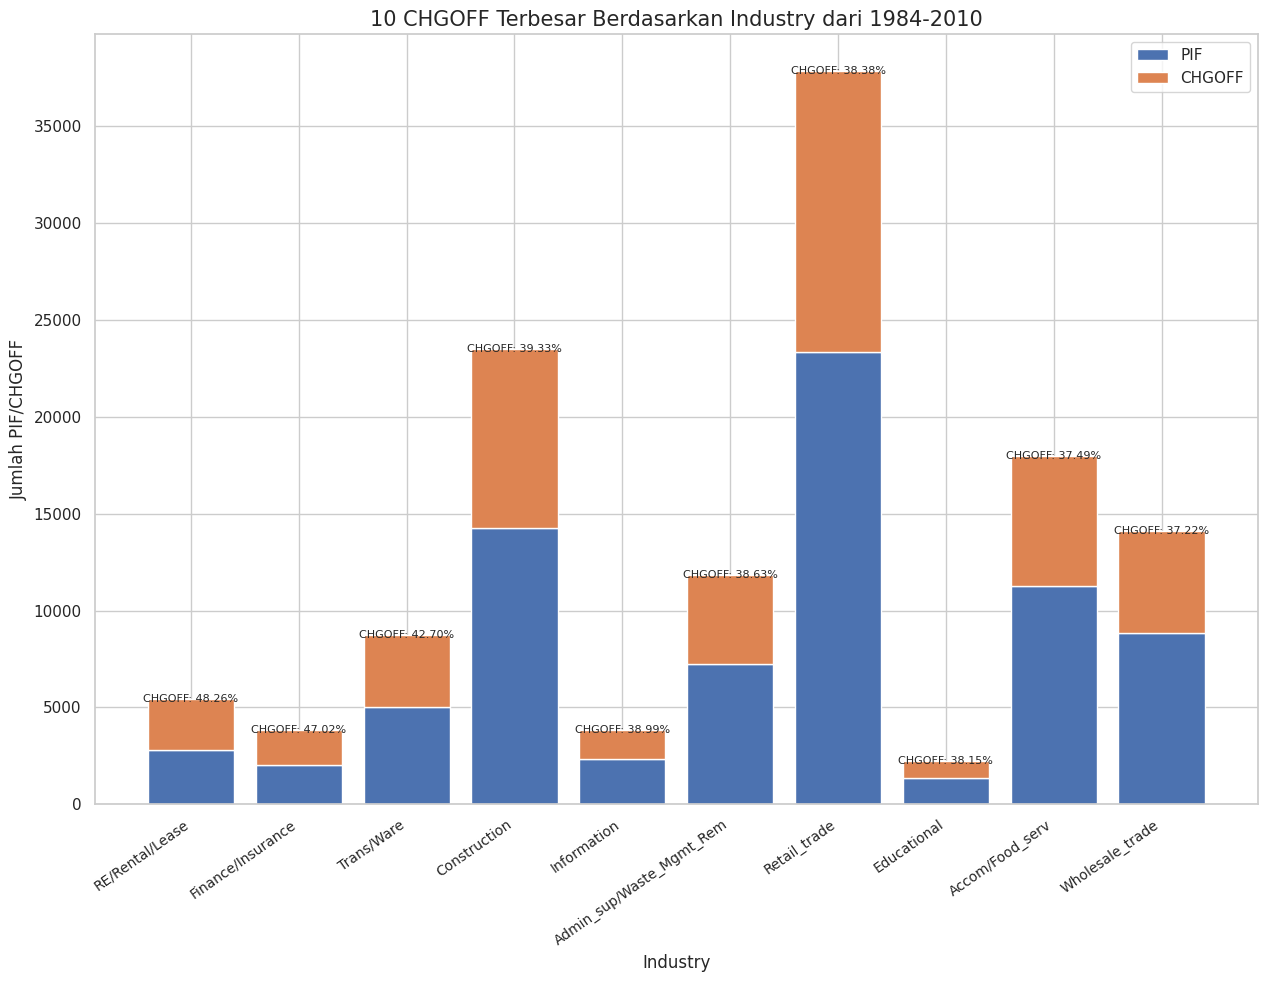

In [ ]:
# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Menghitung persentase CHGOFF
    data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

    # Mengambil 10 data dengan persentase CHGOFF terbesar
    top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=False).head(10)

    # Plot bar PIF
    ax.bar(top_10.index, top_10[1], label='PIF')

    # Plot bar CHGOFF di atas PIF
    ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

    # Tambahkan label persentase CHGOFF di atas batang CHGOFF dan PIF
    for index, row in top_10.iterrows():
        chgoff_percentage = row['CHGOFF_Percentage']
        ax.text(index, row[0] + row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

    # Mengatur label pada sumbu x
    ax.set_xticklabels(top_10.index, rotation=35, horizontalalignment='right', fontsize=10)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 10))

# Memanggil fungsi stacked
stacked(df=df, col='Industry', ax=ax)

# Menambahkan judul dan label pada grafik
ax.set_title('10 CHGOFF Terbesar Berdasarkan Industry dari 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Jumlah PIF/CHGOFF')

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


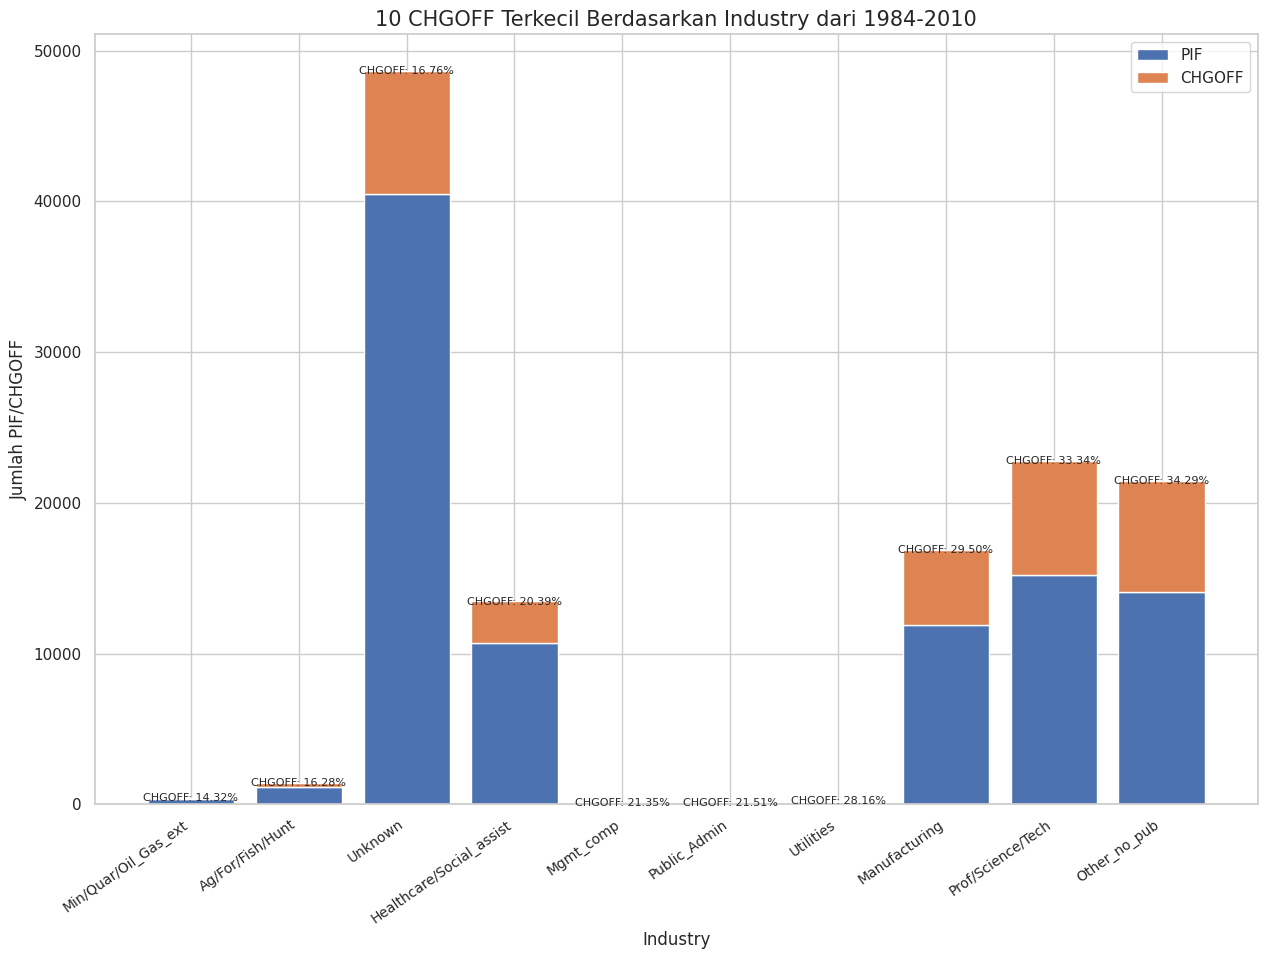

In [ ]:
# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Menghitung persentase CHGOFF
    data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

    # Mengambil 10 data dengan persentase CHGOFF terkecil
    top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=True).head(10)

    # Plot bar PIF
    ax.bar(top_10.index, top_10[1], label='PIF')

    # Plot bar CHGOFF di atas PIF
    ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

    # Tambahkan label persentase CHGOFF di atas batang CHGOFF dan PIF
    for index, row in top_10.iterrows():
        chgoff_percentage = row['CHGOFF_Percentage']
        ax.text(index, row[0] + row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

    # Mengatur label pada sumbu x
    ax.set_xticklabels(top_10.index, rotation=35, horizontalalignment='right', fontsize=10)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 10))

# Memanggil fungsi stacked
stacked(df=df, col='Industry', ax=ax)

# Menambahkan judul dan label pada grafik
ax.set_title('10 CHGOFF Terkecil Berdasarkan Industry dari 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Jumlah PIF/CHGOFF')

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()

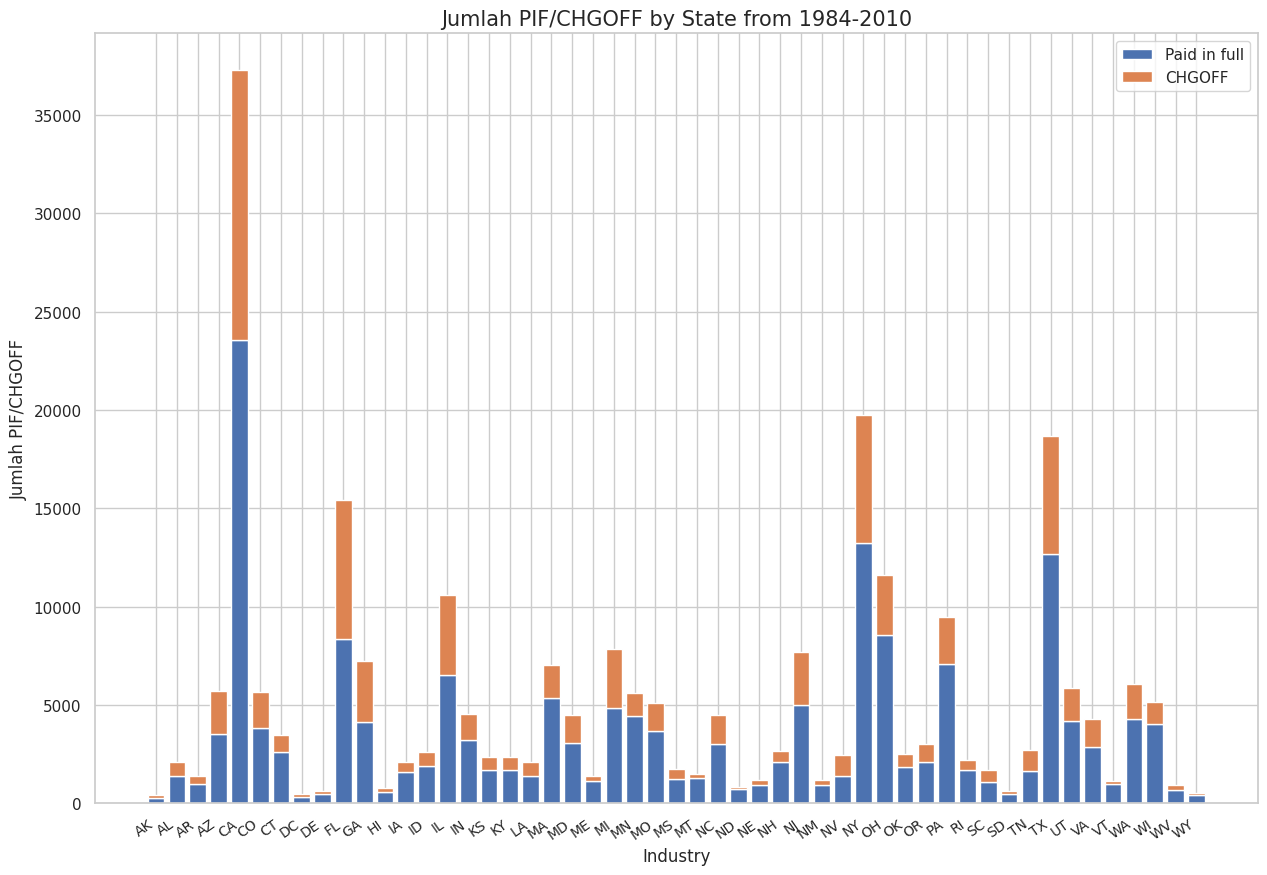

In [ ]:
# PIF dan CHGOFF by State

fig, ax = plt.subplots(figsize=(15, 10))

# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    ax.bar(data.index, data[1], label='Paid in full')
    ax.bar(data.index, data[0], bottom=data[1], label='CHGOFF')


stacked(df=df, col='State', ax=ax)
ax.set_xticklabels(df.groupby(['State', 'MIS_Status_int'])['State'].count().unstack('MIS_Status_int').index,
                   rotation=35, horizontalalignment='right', fontsize=10)

ax.set_title('Jumlah PIF/CHGOFF by State from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Jumlah PIF/CHGOFF')
ax.legend()
plt.show()

In [ ]:
# Cek Persentase CHGOFF untuk tiap State

df_State = df.groupby(['State', 'MIS_Status_int'])['Industry'].count().unstack('MIS_Status_int')
df_State['Persentase'] = df_State[0] / (df_State[0] + df_State[1])
df_State['Persentase'].sort_values(ascending=False)

State
FL   0.46
GA   0.43
NV   0.42
TN   0.39
AZ   0.39
IL   0.39
MI   0.38
AK   0.37
CA   0.37
NJ   0.35
SC   0.35
DC   0.35
AL   0.34
LA   0.33
NY   0.33
CO   0.33
NC   0.33
VA   0.32
TX   0.32
MD   0.32
WA   0.29
AR   0.29
IN   0.29
OR   0.29
DE   0.29
MS   0.29
UT   0.28
KY   0.28
MO   0.28
ID   0.28
KS   0.27
OK   0.27
OH   0.26
HI   0.26
PA   0.25
CT   0.25
WV   0.25
NM   0.24
MA   0.24
IA   0.23
RI   0.22
WI   0.21
NE   0.21
NH   0.21
MN   0.20
SD   0.19
ME   0.17
MT   0.15
ND   0.15
WY   0.14
VT   0.14
Name: Persentase, dtype: float64

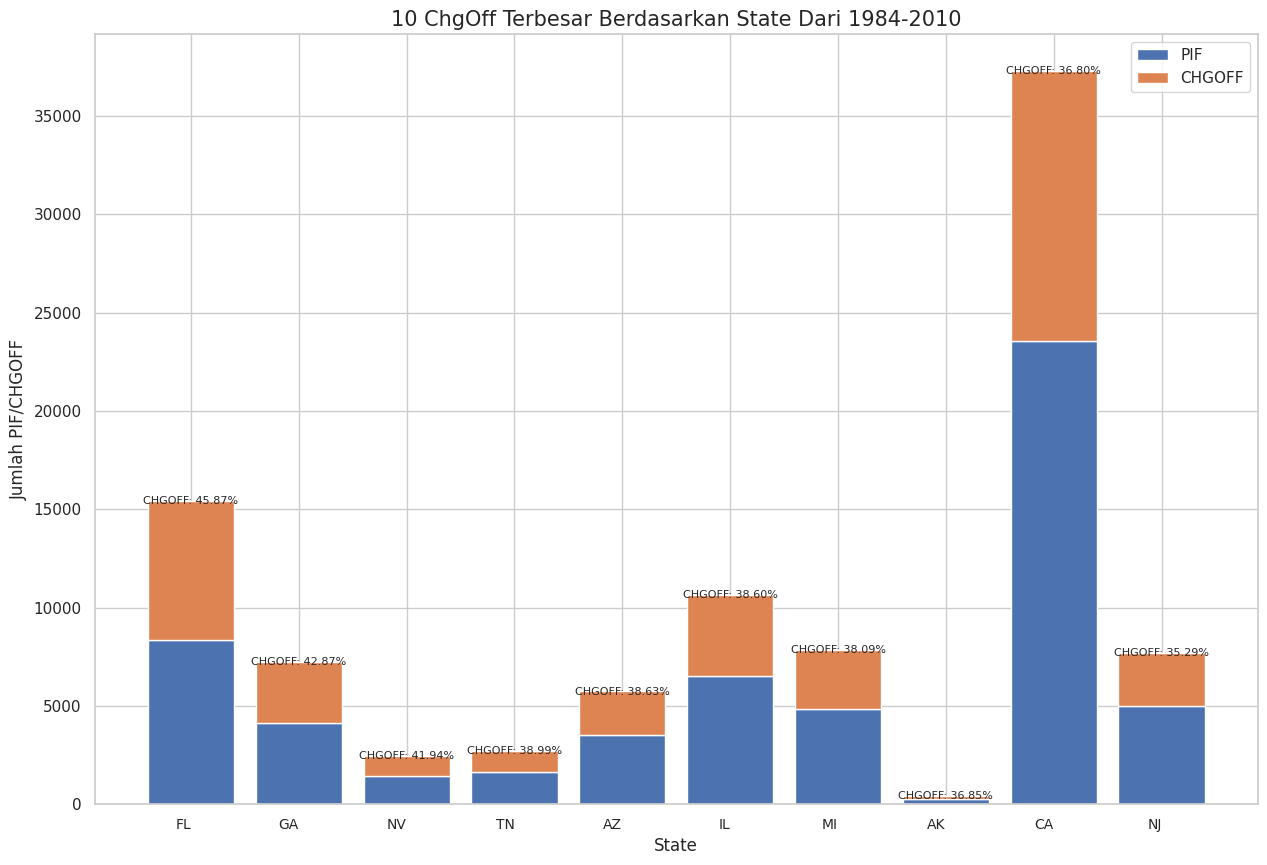

In [ ]:
# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Menghitung persentase CHGOFF
    data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

    # Mengambil 10 data dengan persentase CHGOFF terbesar
    top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=False).head(10)

    # Plot bar PIF
    ax.bar(top_10.index, top_10[1], label='PIF')

    # Plot bar CHGOFF di atas PIF
    ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

    # Tambahkan label persentase CHGOFF
    for index, row in top_10.iterrows():
        chgoff_percentage = row['CHGOFF_Percentage']
        ax.text(index, row[0]+row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

    # Mengatur label pada sumbu x
    ax.set_xticklabels(top_10.index, rotation=0, horizontalalignment='right', fontsize=10)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 10))

# Memanggil fungsi stacked
stacked(df=df, col='State', ax=ax)

# Menambahkan judul dan label pada grafik
ax.set_title('10 ChgOff Terbesar Berdasarkan State Dari 1984-2010', fontsize=15)
ax.set_xlabel('State')
ax.set_ylabel('Jumlah PIF/CHGOFF')

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()

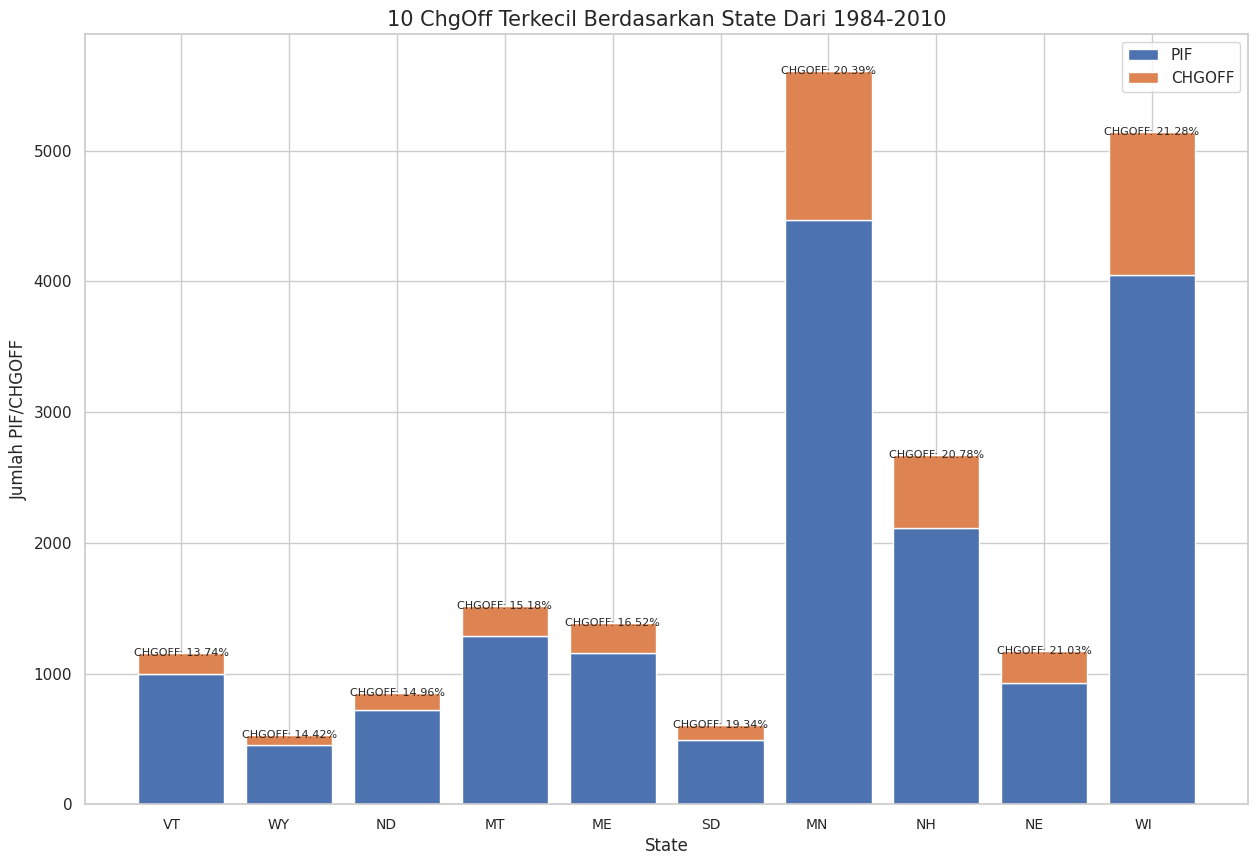

In [ ]:
import matplotlib.pyplot as plt

# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Menghitung persentase CHGOFF
    data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

    # Mengambil 10 data dengan persentase CHGOFF terkecil
    top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=True).head(10)

    # Plot bar PIF
    ax.bar(top_10.index, top_10[1], label='PIF')

    # Plot bar CHGOFF di atas PIF
    ax.bar(top_10.index, top_10[0], bottom=top_10[1], label='CHGOFF')

    # Tambahkan label persentase CHGOFF
    for index, row in top_10.iterrows():
        chgoff_percentage = row['CHGOFF_Percentage']
        ax.text(index, row[0]+row[1], f'CHGOFF: {chgoff_percentage:.2f}%', ha='center', va='center', fontsize=8)

    # Mengatur label pada sumbu x
    ax.set_xticklabels(top_10.index, rotation=0, horizontalalignment='right', fontsize=10)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 10))

# Memanggil fungsi stacked
stacked(df=df, col='State', ax=ax)

# Menambahkan judul dan label pada grafik
ax.set_title('10 ChgOff Terkecil Berdasarkan State Dari 1984-2010', fontsize=15)
ax.set_xlabel('State')
ax.set_ylabel('Jumlah PIF/CHGOFF')

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()

#### Insight

* Kebanyakan perusahaan dapat membayar penih pinjamannya, hanya 32,3% yang tidak dapat membayar secara lunas

MIS Status by Industry
* Selain unknown insudtri, industri retail trade dan manufacturing memiliki jumlah pinjaman cair yang besar dibandingkan industri lainnya.
* Untuk rata-rata, industri Mgmt_comp, manufacturing, oil_gas, dan Agro Fishery memiliki rata-rata pinjaman yang besar, meskipun total jumlah pinjaman di grafik sebelumnya termasuk kecil. Hal ini mengindikasikan bahwa jumlah peminjam di sektor ini masih sedikit.
* Terdapat 3 Industri yang memiliki tingkat gagal bayar paling tinggi yaitu RE/Rental/Lease (48%), Finance/Insurance (47%), dan Trans/Ware (43%)
* Sedangkan untuk Industri dengan tingkat gagal bayar terendah ada pada Healthcare/Social_assist(20%), Ag/For/Fish/Hunt (16 %), dan Min/Quar/Oil_Gas_ext (14%)

MIS Status by State
* 3 Wilayah yang memiliki jumlah pinjaman terbanyak ada pada California, New York, dan Texas. Meskupin begitu tingkat gagal bayar pada wilayah tersebut juga cukup tinggi. CA ada di angka 37%, NY(33%), dan TX(32%).
* Florida (46%),Georgia(43%), dan Nevada(42%) merupakan 3 wilayah dengan tingkat gagal bayar tertinggi pada periode waktu data.
* Sedangkan 3 wilayah dengan tingkat gagal bayar terendah ada pada ND(15%), WY(14%), dan VT(14%)

Business Recommendation:
* Target peminjam bisa dipromosikan lebih pada perusahaan berbasis management company, Min/Quar/Oil_Gas_ext, dan Ag/For/Fish/Hunt karena memiliki **rata-rata pinjaman yang besar, jumlah peminjam yang belum begitu banyak, dan paling penting memiliki tingkat gagal bayar yang rendah**. Salah satu hal yang dapat dilakukan untuk mempromosikan pinjaman yaitu memberikan jalur khusus dan potongan bunga pada peminjam dengan sektor perusahaan tersebut.
* Peningkatan Manajemen Risiko di Industri dengan Tingkat Gagal Bayar Tinggi. Untuk industri seperti Real Estate/Rental/Lease, Finance/Insurance, Transportation/Warehousing dll yang memiliki tingkat gagal bayar tinggi, perusahaan harus lebih berhati-hati dalam manajemen risiko dan penilaian kredit. Ini dapat mencakup peningkatan proses verifikasi, pengembangan strategi pengambilan keputusan yang lebih baik, dan pemantauan aktif pelanggan dalam sektor tersebut.
* Evaluasi Strategi Pemasaran di Wilayah Dengan Tingkat Gagal Bayar Tinggi. Untuk wilayah seperti Florida, Georgia, Nevada dll yang memiliki tingkat gagal bayar tinggi, perusahaan harus memeriksa strategi pemasaran dan penilaian risiko di wilayah tersebut. Mungkin dapat dilakukan dengan peningkatan dalam penilaian kredit atau pengurangan eksposur risiko di wilayah ini.